# Mohon menggunakan GPU yang disediakan Colab (Runtime > Change Runtime Type > GPU > Save)

**Nama: Alvin Rachmat**

**Project: Computer Vison - Mendeteksi suit batu, gunting, atau kertas**

**Indosat Ooredoo x Dicoding Machine Learning**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-24 09:24:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.29MB/s    in 75s     

2021-05-24 09:25:18 (4.09 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
dir='/tmp/rockpaperscissors/rps-cv-images'

datagen=ImageDataGenerator(
                    rescale=1./255,

                    # Merotasi gambar dalam rentang 40 derajat
                    rotation_range=40,

                    # Flipping gambar
                    horizontal_flip=True,
                    vertical_flip=True, #Tidak diajarkan di kelas dicoding

                    # Menggeser-geser gambar
                    width_shift_range=0.2, #Tidak diajarkan di kelas dicoding
                    height_shift_range=0.2, #Tidak diajarkan di kelas dicoding

                    # Shear transformation (skewing) gambar
                    shear_range = 0.2,

                    # Rentang zoom 0.8-1.2x
                    zoom_range=0.2,
                    
                    # Kecerahan rentang 90%-100%
                    brightness_range=[0.9,1.0], #Tidak diajarkan di kelas dicoding

                    # Metode filling warna untuk mengisi bagian yang kosong setelah digeser/rotasi/etc
                    fill_mode = 'nearest',
                    
                    #Membagi gambar menjadi 40% untuk data validasi, sisanya training
                    validation_split=0.4
                    )

train_generator = datagen.flow_from_directory(
        dir,  # Direktori foto
        target_size=(100, 150),
        # Resolusi input 200 x 300 merujuk pada readme notes
        # Namun pengecilan gambar sesuai rasio dilakukan agar proses komputasi menjadi lebih cepat
        # Rasio setengah dipilih agar tidak terlalu menghilangkan performa
        batch_size=1,
        class_mode='categorical', # Klasifikasi tiga kelas sehingga kategorinya adalah categorical
        subset='training'
        )

# Lakukan hal yang sama untuk data validasi
validation_generator = datagen.flow_from_directory(
        dir,
        target_size=(100, 150),
        batch_size=1,
        class_mode='categorical',
        subset='validation'
        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential(
    [
    tf.keras.Input((100,150,3)), # Tidak diajarkan di kelas dicoding. Style input berbeda yang hasil akhirnya sama
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'), # Menggunakan lebih banyak hidden layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'), # Selain itu filternya juga ditingkatkan dengan pola yang berbeda dari kelas dicoding
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'), # Peningkatannya berpangkat dua untuk memaksimalkan kinerja GPU dalam satu kali layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # Umumnya CNN menggunakan dua layer FC (Fully Connected) saja 
    tf.keras.layers.Dense(3, activation='softmax') # Output layer ada 3 sehingga menggunakan softmax function
    ]
)

In [6]:
model.compile(loss='categorical_crossentropy', # Tidak diajarkan di kelas dicoding 
              # (Yang dipakai di dicoding adalah sparse_categorical_entropy pada latihan data Mnist)

              optimizer='sgd', # Kelebihan Adam adalah cepat namun cukup baik, sedangkan SGD lambat namun menggeneralisasi lebih baik
              # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
              
              metrics=['accuracy']
              )

In [7]:
# Memanggil kembali epoch dengan performa terbaik setelah sejumlah 'patience' tertentu tiada peningkatan
set_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15) # Tidak diajarkan di kelas dicoding

history = model.fit(
      train_generator,
      epochs = 70,
      validation_data=validation_generator,
      callbacks=[set_callback],
      verbose = 2
      )

Epoch 1/70
1314/1314 - 50s - loss: 1.0839 - accuracy: 0.4064 - val_loss: 1.0327 - val_accuracy: 0.6053
Epoch 2/70
1314/1314 - 19s - loss: 0.7398 - accuracy: 0.6553 - val_loss: 0.5054 - val_accuracy: 0.7712
Epoch 3/70
1314/1314 - 20s - loss: 0.4811 - accuracy: 0.7938 - val_loss: 0.2980 - val_accuracy: 0.8924
Epoch 4/70
1314/1314 - 20s - loss: 0.3642 - accuracy: 0.8615 - val_loss: 0.2379 - val_accuracy: 0.9279
Epoch 5/70
1314/1314 - 20s - loss: 0.3382 - accuracy: 0.8828 - val_loss: 0.1396 - val_accuracy: 0.9554
Epoch 6/70
1314/1314 - 20s - loss: 0.2254 - accuracy: 0.9209 - val_loss: 0.0911 - val_accuracy: 0.9691
Epoch 7/70
1314/1314 - 20s - loss: 0.2264 - accuracy: 0.9231 - val_loss: 0.0942 - val_accuracy: 0.9691
Epoch 8/70
1314/1314 - 20s - loss: 0.1530 - accuracy: 0.9475 - val_loss: 0.4680 - val_accuracy: 0.8455
Epoch 9/70
1314/1314 - 20s - loss: 0.1522 - accuracy: 0.9444 - val_loss: 0.4379 - val_accuracy: 0.7872
Epoch 10/70
1314/1314 - 20s - loss: 0.1538 - accuracy: 0.9422 - val_loss:

In [8]:
model.evaluate(validation_generator, verbose=2)

874/874 - 7s - loss: 0.0338 - accuracy: 0.9908


[0.033817633986473083, 0.9908466935157776]

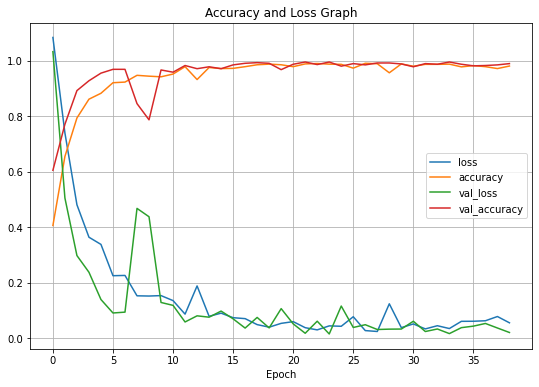

In [9]:
# Memplot performa loss dan accuracy dari model setiap epoch-nya
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(9,6))
plt.xlabel('Epoch')
plt.title('Accuracy and Loss Graph')
plt.grid()

Saving photo_2021-05-20_02-34-45.jpg to photo_2021-05-20_02-34-45.jpg
[[0. 0. 1.]]
photo_2021-05-20_02-34-45.jpg
Scissor
Again? [(yes: enter) / (no: ~enter)]n


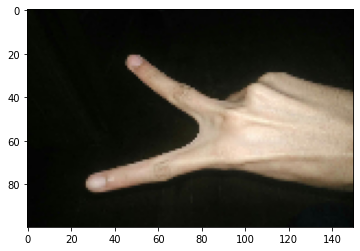

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

i=''

while(i==''):
  uploaded=files.upload()

  for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    # Karena menggunakan categorical_crossentropy pada loss,
    # terjemahkan hasilnya dengan argmax: me-return index yang memiliki nilai terbesar
    j = np.argmax(classes)
    
    print(classes)
    print(fn)

    if j==0:
      print('Paper')
    elif j==1:
      print('Rock')
    elif j==2:
      print('Scissor')

  i=input('Again? [(yes: enter) / (no: ~enter)]')